# Lab 9.6.4 and 9.6.5

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

# Lab 9.6.4 SVM with multiple classses

In [2]:
np.random.seed(1)
X = np.random.normal(size = (250,2))
X[150:200] += 2
X[200:250] += 5
y = [0]*150 + [1]*50 + [2]*50

data = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
data.head()

,X1,X2,y
0,1.624345,-0.611756,0
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,0
4,0.319039,-0.249370,0


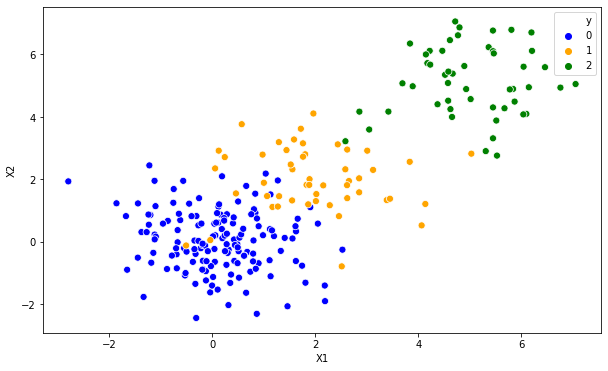

In [3]:
#plotting the data 
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'y',data = data,s = 50,palette=['blue','orange','green'])

In [4]:
svm = SVC()
svm.fit(data.drop('y',axis=1),data['y'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'X2')

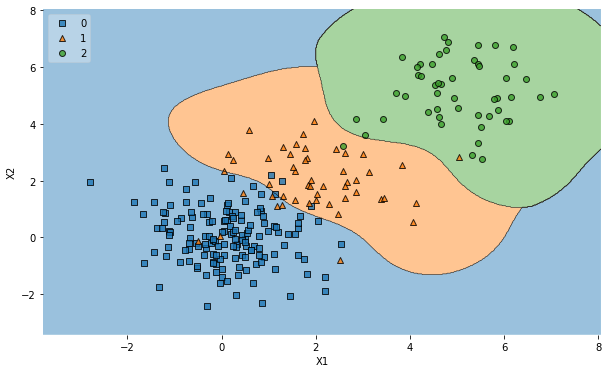

In [5]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svm, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')

# LAB-9.6.5 Application to Gene Expression Data

In [11]:
train = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\khan_train.csv',index_col = 0)
train = train.T
print(train.shape)
train.head()

(64, 2308)


,1,2,3,4,5,6,7,8,9,10,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
EWS.T1,3.2025,0.0681,1.0460,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,2.9001,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.7240,0.2044
EWS.T2,1.6547,0.0710,1.0409,0.0520,0.2045,2.1609,2.4452,1.1473,0.7371,1.9989,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.4140,1.2708,0.2990
EWS.T3,3.2779,0.1160,0.8926,0.1014,0.2818,1.9773,3.2590,1.4106,0.9548,2.0775,...,1.2674,1.5152,0.2382,0.8720,0.6819,0.3221,0.2156,0.3227,1.2142,0.2230
EWS.T4,1.0060,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,1.6610,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
EWS.T6,2.7098,0.2367,0.3693,0.2190,0.3711,1.7800,3.2376,0.6769,0.8546,0.6808,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [12]:
test = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\khan_test.csv',index_col = 0)
test = test.T
print(test.shape)
test.head()

(25, 2308)


,1,2,3,4,5,6,7,8,9,10,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
TEST.9,1.7733,0.4875,0.5832,0.3514,0.7182,4.7686,8.8864,2.2408,0.8908,3.5985,...,1.7174,0.7078,0.1307,0.2834,0.1558,0.2899,0.2239,0.3658,0.6412,0.2182
TEST.11,0.1397,0.0846,2.3266,0.1188,0.3497,2.6046,3.9808,1.8516,1.3238,1.9454,...,0.7283,1.3666,0.2613,1.1244,0.2988,0.2298,0.1414,0.1283,0.7414,0.7103
TEST.5,1.9420,0.2103,2.4897,0.1770,0.5963,2.9903,4.2457,2.4517,1.6298,2.2302,...,0.2924,0.4544,0.5507,0.2250,0.2284,0.6212,0.1504,1.9152,0.9166,0.1850
TEST.8,0.7721,0.1855,1.1922,0.0979,0.1841,0.9914,9.9955,1.5774,0.7100,2.0473,...,0.1288,0.2941,0.3197,0.3858,1.3418,0.2996,0.2328,0.5194,0.9413,0.3751
TEST.10,0.3296,0.3510,0.4258,0.0737,0.1702,0.2839,4.1636,0.4754,1.8462,0.5868,...,0.3817,0.3617,0.3710,0.5255,0.0979,0.2380,0.6157,1.6150,0.3655,0.4591


## Although both the train and test data are now having same number of columns, but i am still not able to get the target variable...

# Till Next time, Happy Learning :)